In [1]:
import csv
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading of the CSV file which contains all needed data 
with open("CSV_Creation/daily_data_by_country.csv") as f:
    daily_data_by_country = pd.read_csv(f,  error_bad_lines=False)

with open('Sources/COVID-19-master/time_series_covid19_deaths_global.csv') as f:
    deaths_data = pd.read_csv(f, error_bad_lines=False)

In [3]:
#most of deaths come from the northern part of the hemisphere

#last day reported in the data 
last_day = deaths_data.columns[-1]
last_number_day = max(daily_data_by_country['Day_number'].values)

deaths_data = deaths_data[['Country/Region','Lat','Long', last_day]]
total_deaths = deaths_data[last_day].sum()
total_deaths_in_the_north = deaths_data.loc[(deaths_data['Lat'] > 19) & (deaths_data['Lat'] < 61), last_day].sum()
proportion = total_deaths_in_the_north/total_deaths*100
print("{}% of deaths come from the northern part of the hemisphere.".format(round(proportion)))

96.0% of deaths come from the northern part of the hemisphere.


In [4]:
#mean and max of the recovered rate and the death rate

print("DataFrame which represents the mean of both rates:\n",daily_data_by_country[['Death_rate', 'Recovery_rate']].mean())
print("\n")
print("DataFrame which represents the max of both rates:\n", daily_data_by_country[['Death_rate', 'Recovery_rate']].max())

DataFrame which represents the mean of both rates:
 Death_rate       0.025862
Recovery_rate    0.131831
dtype: float64


DataFrame which represents the max of both rates:
 Death_rate       1.0
Recovery_rate    1.0
dtype: float64


In [5]:
#explanation of a max death rate equal to one

#days where the death rate was equal to one 
print(daily_data_by_country.loc[daily_data_by_country['Death_rate']==1.0, ['Day_number', 'Country', 'Confirmed', 'Deaths']])
print("\n")
#an example where the death rate was equal to one: Sudan. 
print(daily_data_by_country.loc[(daily_data_by_country['Country']=='Sudan') & (daily_data_by_country['Day_number']>47) & (daily_data_by_country['Day_number']<60) , ['Day_number', 'Country', 'Confirmed', 'Deaths']])

       Day_number Country  Confirmed  Deaths
5260           28    Iran          2       2
9322           50  Guyana          1       1
9507           51  Guyana          1       1
9593           51   Sudan          1       1
9692           52  Guyana          1       1
9778           52   Sudan          1       1
9963           53   Sudan          1       1
10148          54   Sudan          1       1
10333          55   Sudan          1       1


       Day_number Country  Confirmed  Deaths
9038           48   Sudan          0       0
9223           49   Sudan          0       0
9408           50   Sudan          0       0
9593           51   Sudan          1       1
9778           52   Sudan          1       1
9963           53   Sudan          1       1
10148          54   Sudan          1       1
10333          55   Sudan          1       1
10518          56   Sudan          2       1
10703          57   Sudan          2       1
10888          58   Sudan          2       1
11073   

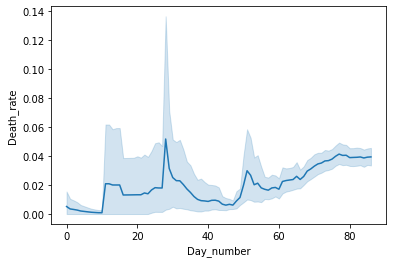

In [6]:
#however, the mean of the dead rate means nothing because of the lack of data espiacially at the begenning of the pandemic 
sns.lineplot(x = 'Day_number', y = 'Death_rate', data = daily_data_by_country)

Yesterday, the death rate's average was 0.03939743364980955
Yesterday, the death rate's maximum was 0.2222222222222222


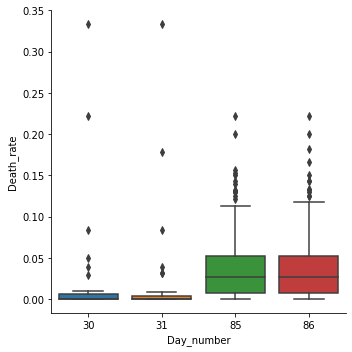

In [7]:
#the dead's rate distribution is more accurate nowadays than by the past 
sns.catplot(x="Day_number", y="Death_rate", kind="box", data=daily_data_by_country.loc[daily_data_by_country['Day_number'].isin([30, 31,last_number_day -1, last_number_day])])
print("Yesterday, the death rate's average was", daily_data_by_country[['Day_number', 'Death_rate']].groupby('Day_number').mean().values[last_number_day,0])
print("Yesterday, the death rate's maximum was", daily_data_by_country[['Day_number', 'Death_rate']].groupby('Day_number').max().values[last_number_day,0])

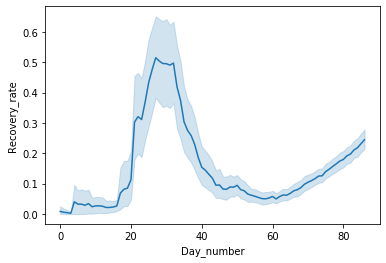

In [8]:
#same method for the recovery rate 
sns.lineplot(x = 'Day_number', y = 'Recovery_rate', data = daily_data_by_country)

Yesterday, the recovered rate's average was 0.24506571435312485
Yesterday, the recovered rate's maximum was 0.9258834765998091


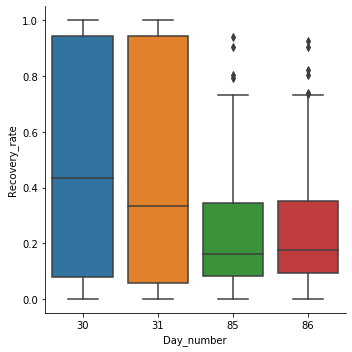

In [9]:
sns.catplot(x="Day_number", y="Recovery_rate", kind="box", data=daily_data_by_country.loc[daily_data_by_country['Day_number'].isin([30,31,last_number_day - 1,last_number_day])])
print("Yesterday, the recovered rate's average was", daily_data_by_country[['Day_number', 'Recovery_rate']].groupby('Day_number').mean().values[last_number_day,0])
print("Yesterday, the recovered rate's maximum was", daily_data_by_country[['Day_number', 'Recovery_rate']].groupby('Day_number').max().values[last_number_day,0])

In [10]:
#discover of patterns between countries that are presented to handle well the crisis and other countries 

well_countries = ['Germany', 'China', 'Austria', 'Denmark', 'South Korea']
other_countries = ['United Kingdom', 'US', 'France', 'Spain', 'Italy']

well_countries.sort()
other_countries.sort()

#selection of data thanks to SQL requiries 
well_daily_data_by_country = daily_data_by_country.loc[daily_data_by_country['Country'].isin(well_countries),:]
other_daily_data_by_country = daily_data_by_country.loc[daily_data_by_country['Country'].isin(other_countries),:]

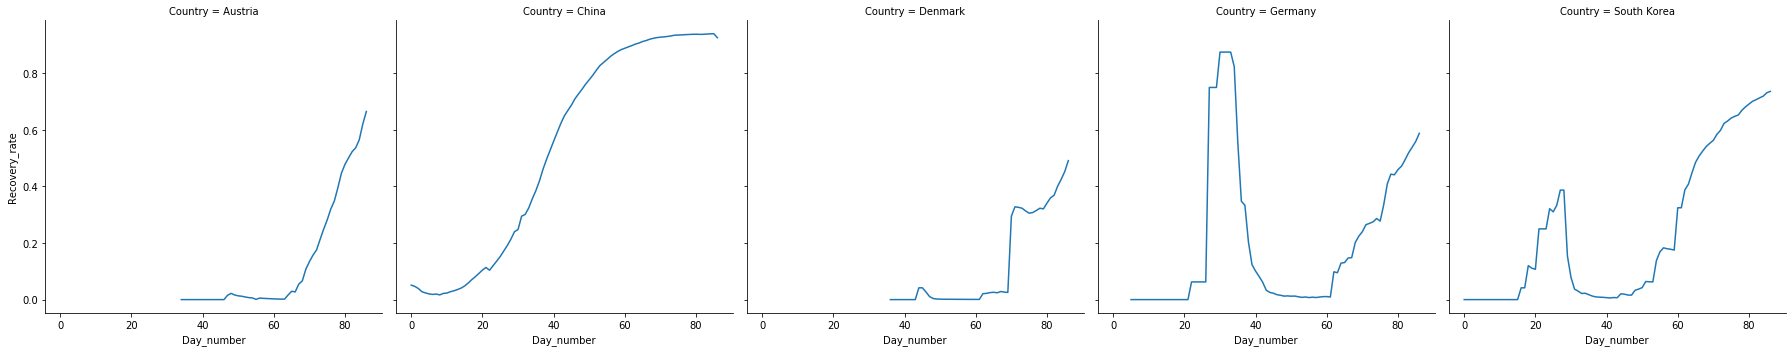

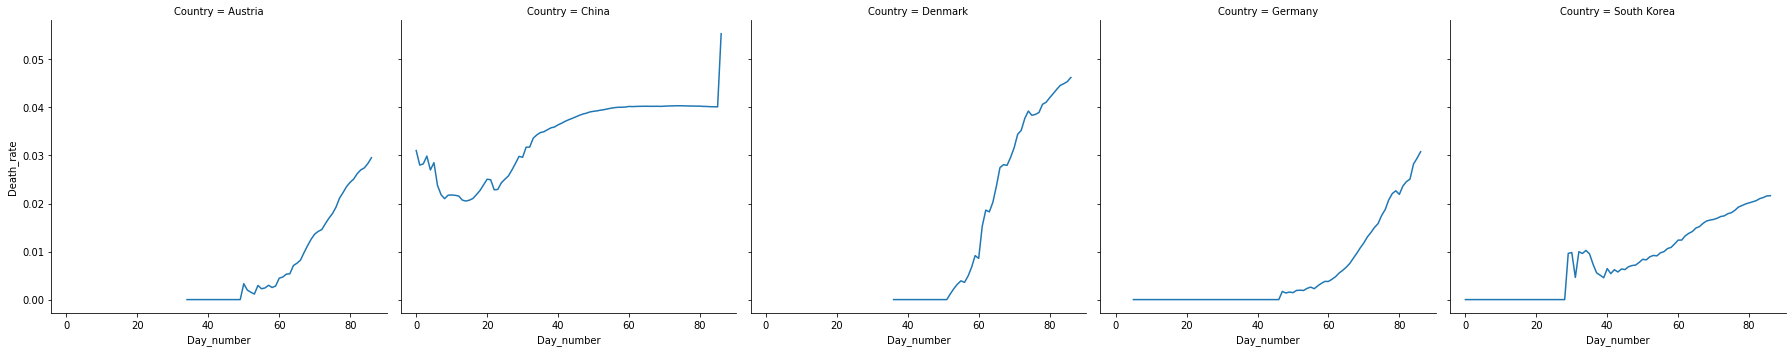

In [11]:
#recovered and death rate plotting for "good" countries
sns.relplot(x = 'Day_number', y ='Recovery_rate', col = 'Country', kind = 'line', data = well_daily_data_by_country)
sns.relplot(x = 'Day_number', y ='Death_rate', col = 'Country', kind = 'line', data = well_daily_data_by_country)

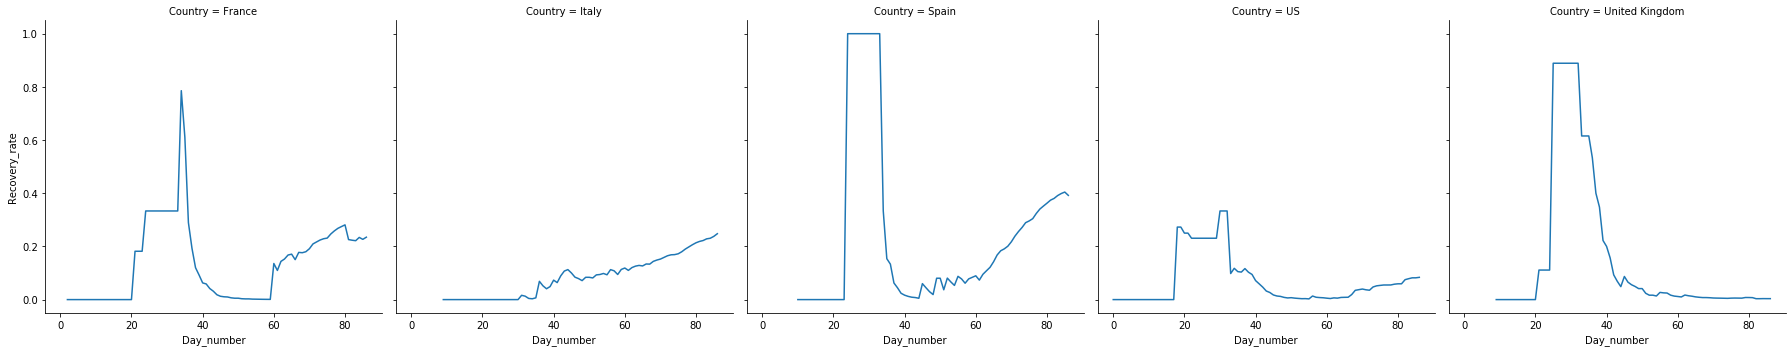

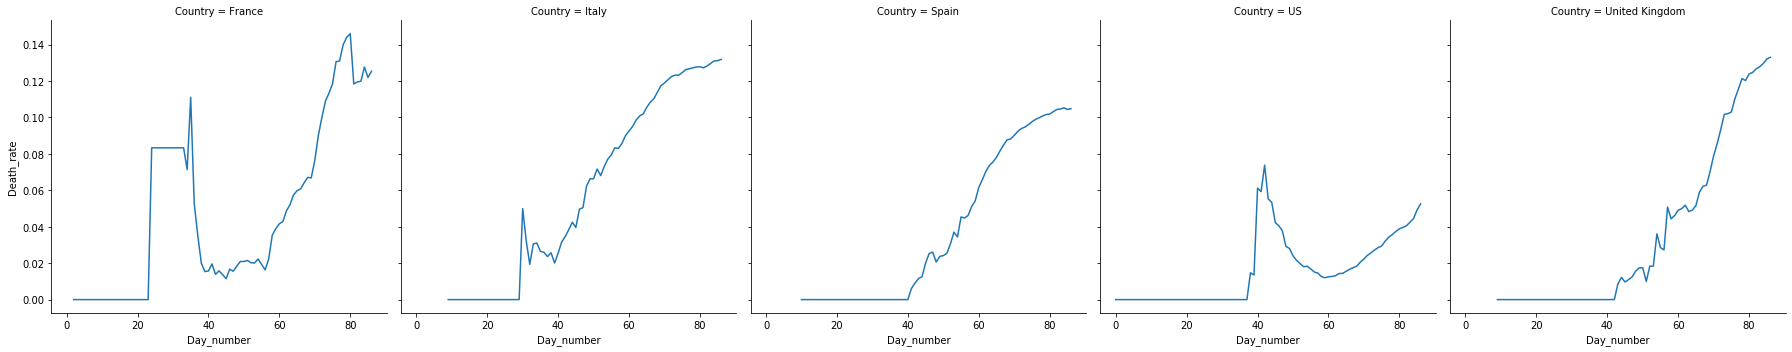

In [12]:
#recovered and death rate plotting for "bad" countries
sns.relplot(x = 'Day_number', y ='Recovery_rate', col = 'Country', kind = 'line', data = other_daily_data_by_country)
sns.relplot(x = 'Day_number', y ='Death_rate', col = 'Country', kind = 'line', data = other_daily_data_by_country)

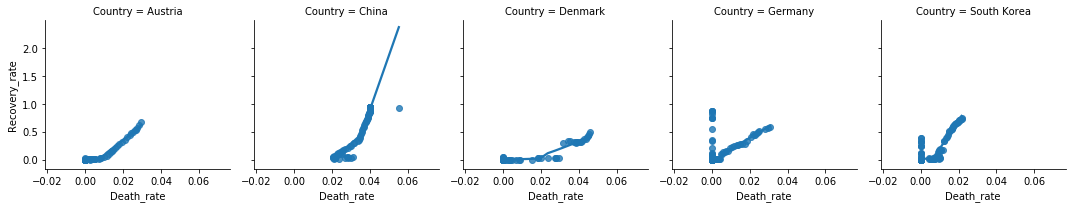

In [13]:
#correlation between the recovered rate and the death rate for countries that handle the crisis well
sns.lmplot(x='Death_rate', y='Recovery_rate', data = well_daily_data_by_country, col = "Country", col_wrap = 5, height = 3, lowess = True)

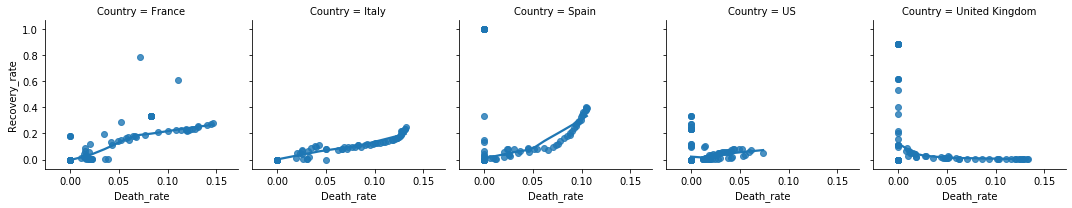

In [14]:
#correlation between the recovered rate and the death rate for other countries 
sns.lmplot(x='Death_rate', y='Recovery_rate', data = other_daily_data_by_country, col = "Country", col_wrap = 5, height = 3, lowess = True)